In [1]:
import numpy as np
import scipy

In [18]:
import sys
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')

In [19]:
import change_point_analysis as cpa

In [5]:
on_inds

array([23, 21, 25, 12, 23, 20,  0, 29, 28, 19, 28, 19, 15, 11, 18, 15,  6,
        3,  9, 21,  9, 22,  6, 12, 16, 28, 14, 22, 23, 23,  4, 12,  3, 18,
       16,  2, 11, 13, 11,  6, 26, 20, 13,  7,  9, 22, 11, 19, 24, 28, 19,
       25, 29,  2, 10, 19, 16, 22,  2, 27, 14, 24, 22, 24, 29,  8, 17, 21,
        8, 12, 27, 26, 19, 20, 13, 25, 23, 12, 17, 11, 24, 26,  9,  9, 13,
        0, 20, 28, 15, 20, 17, 14, 25,  2, 15,  7, 21, 26,  6,  0,  9, 12,
       27, 25, 20,  4, 25, 20,  0,  5, 20,  7, 14,  8,  1, 28, 26, 22, 27,
       26, 29, 29,  6,  9, 28, 16,  5, 21,  7, 23,  8, 16, 24, 19, 22, 22,
       17,  1, 24, 22, 18, 13, 17,  0, 13, 18, 22, 19,  5, 19, 27,  5,  4,
        6, 16,  2, 29, 27,  4, 25, 14, 12,  0,  5, 19, 20,  2, 18, 27, 24,
       27, 11, 26,  7, 16,  5, 22,  0, 21, 22, 19,  0,  6,  4, 11, 10,  0,
        5, 11, 28, 26,  0,  5, 15, 15,  6,  6,  5, 28, 17, 18, 19,  1,  9,
       21,  0, 15, 14,  3, 26, 29,  0, 22,  5,  6, 24, 24, 23,  0,  1,  7,
        8, 28, 27, 27, 16

In [26]:
import pandas as pd
X = pd.DataFrame(X)

In [33]:
(cdf_d['on'] > 0.95).sum()

1

In [49]:

X_sim_l = cpa.gen_circular_shuffle(X,nrepeats=600)

In [50]:
sr_l=cpa.get_switch_ratio_in_shuffles(X_sim_l,is_changes_df=True)

In [51]:
cdf_d['on']

0     0.355
1     0.345
2     0.450
3     0.855
4     0.215
5     0.110
6     0.075
7     0.025
8     0.675
9     0.460
10    0.675
11    0.555
12    0.840
13    0.030
14    0.515
15    0.065
16    0.620
17    0.200
18    0.710
19    0.000
20    0.610
21    0.715
22    0.395
23    0.930
24    0.860
25    0.870
26    0.505
27    0.650
28    0.775
29    0.225
Name: on, dtype: float64

In [79]:
xx=np.random.normal(size=(3000,30))
sig=xx>scipy.stats.norm.ppf(0.95)

In [80]:
sig.any(axis=1).mean()

0.7793333333333333

In [83]:
1 - (0.95**30)

0.7853612360570628

In [63]:
(pd.DataFrame(cdf_on_l) > 0.975).any(axis=1).mean()

0.435

In [64]:
0.025 * 30

0.75

In [65]:
X_sim_l

[      0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
 0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 1    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 395  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
 396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 397  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
 398  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
 399  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
 
       23   24   25   26   27   28   29  
 0    0.0  0.0  0.0 

In [52]:
fp_l = []
cdf_on_l = []
for i in range(len(X_sim_l)):
    sr_data = cpa.get_switch_ratio_per_trial(X_sim_l[i],False)
    cdf_d=cpa.test_sig_switch_ratio(sr_data,sr_l)
    cdf_on_l.append(cdf_d['on'])
    fp = (cdf_d['on'] > (1-0.05)).any()
    fp_l.append(fp)
    

In [53]:
np.array(fp_l).mean()

0.695

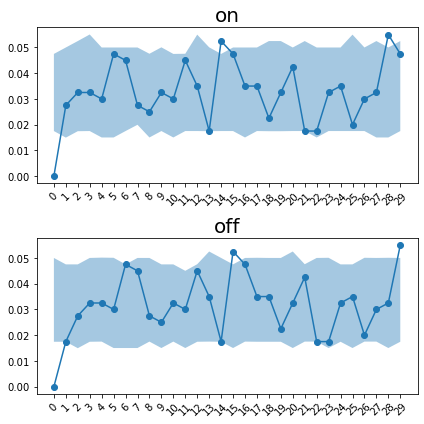

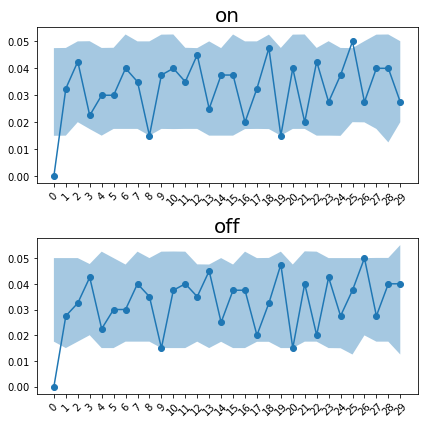

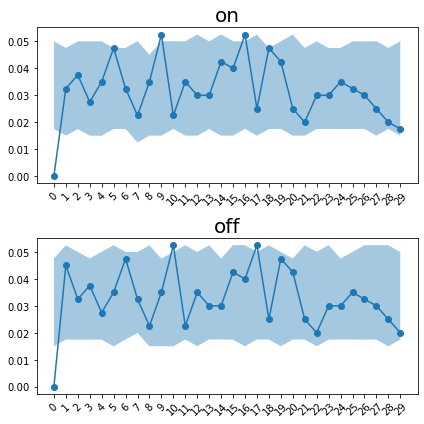

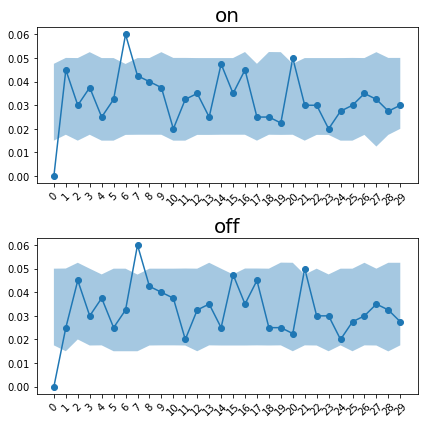

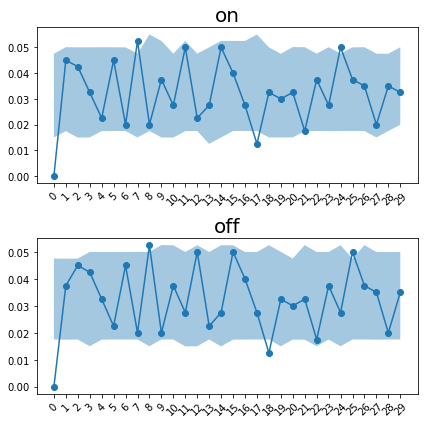

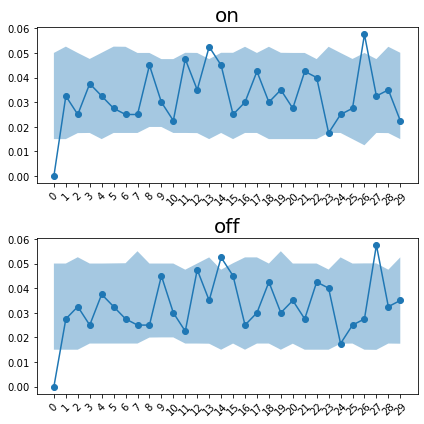

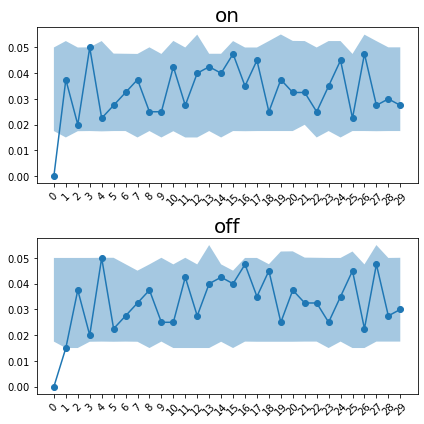

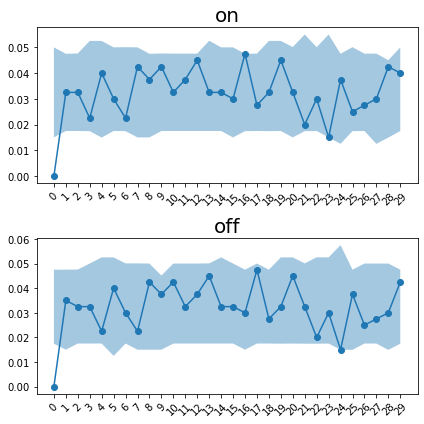

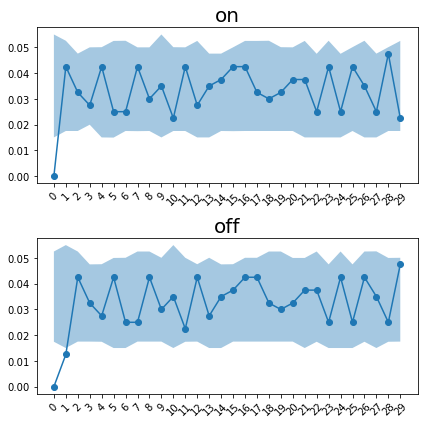

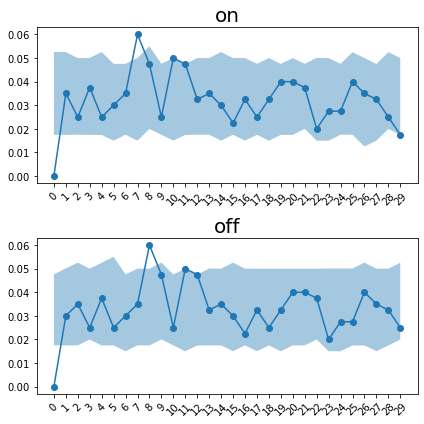

In [36]:

fp_l = []
ntests=10
for i in range(ntests):
    X = np.zeros((400,30))
    on_inds = np.random.randint(X.shape[1],size=X.shape[0])
    X[np.arange(X.shape[0]),on_inds]=1
    X = pd.DataFrame(X)
    
    cdf_d,sr_data,changes_df,fig,axs = cpa.test_switch_ratio_wrapper(X,detect_func=cpa.detect_switch_by_change,alpha=0.05,do_bonf=False,doplots=False,nrepeats=200)
    fp = (cdf_d['on'] > 0.95).sum()
    fp_l.append(fp)


In [37]:
fp_l

[2, 1, 4, 2, 3, 2, 1, 0, 0, 3]